In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_active_2023 = pd.read_csv('fide_active_players_2023_limpio.csv')
df_active_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4996 non-null   object 
 1   Title            4996 non-null   object 
 2   Country          4996 non-null   object 
 3   Standard Rating  4996 non-null   float64
 4   Rapid Rating     4322 non-null   float64
 5   Blitz Rating     4327 non-null   float64
 6   Birth Year       4996 non-null   float64
 7   Age              4996 non-null   float64
dtypes: float64(5), object(3)
memory usage: 312.4+ KB


In [4]:
# hay que actualizar algunos datos pues los elos se han modificado ligeramente en los ultimos meses y seran relevantes en las graficas siguientes

index = df_active_2023.loc[df_active_2023['Name'] == 'Carlsen, Magnus'].index
df_active_2023.loc[index, 'Standard Rating'] = 2830

index = df_active_2023.loc[df_active_2023['Name'] == 'Caruana, Fabiano'].index
df_active_2023.loc[index, 'Standard Rating'] = 2803

index = df_active_2023.loc[df_active_2023['Name'] == 'Nakamura, Hikaru'].index
df_active_2023.loc[index, 'Standard Rating'] = 2789

index = df_active_2023.loc[df_active_2023['Name'] == 'Abdusattorov, Nodirbek'].index
df_active_2023.loc[index, 'Standard Rating'] = 2765

index = df_active_2023.loc[df_active_2023['Name'] == 'Ding, Liren'].index
df_active_2023.loc[index, 'Standard Rating'] = 2762

index = df_active_2023.loc[df_active_2023['Name'] == 'Firouzja, Alireza'].index
df_active_2023.loc[index, 'Standard Rating'] = 2760

index = df_active_2023.loc[df_active_2023['Name'] == 'Nepomniachtchi, Ian'].index
df_active_2023.loc[index, 'Standard Rating'] = 2758

df_active_2023 = df_active_2023.sort_values(by= 'Standard Rating', ascending= False)
df_active_2023 = df_active_2023.reset_index(drop= True)

In [5]:
df_active_2023['Country'].nunique()

164

a ver los mejores jugadores

In [6]:
df_active_2023.head(5).sort_values(by= 'Standard Rating', ascending= False)

,Name,Title,Country,Standard Rating,Rapid Rating,Blitz Rating,Birth Year,Age
0,"Carlsen, Magnus",GM,Norway,2830.0,2818.0,2887.0,1990.0,33.0
1,"Caruana, Fabiano",GM,United States,2803.0,2765.0,2813.0,1992.0,31.0
2,"Nakamura, Hikaru",GM,United States,2789.0,2731.0,2874.0,1987.0,36.0
3,"Abdusattorov, Nodirbek",GM,Uzbekistan,2765.0,2727.0,2694.0,2004.0,19.0
4,"Ding, Liren",GM,China,2762.0,2830.0,2787.0,1992.0,31.0


a ver cuantos hay de cada titulo

In [7]:
df_active_2023.Title.value_counts()

Title
IM    2302
CM    1383
GM    1311
Name: count, dtype: int64

a ver cuantos hay por paises

In [8]:
df_active_2023['Country'].value_counts()

Country
GER              326
Spain            247
Russia           213
India            203
United States    186
                ... 
Isle of Man        1
BAR                1
Cape Verde         1
Taiwan             1
Timor-Leste        1
Name: count, Length: 164, dtype: int64

a ver las medias por federacion segun el estilo de juego

In [9]:
fed_elos = df_active_2023.groupby('Country')['Standard Rating'].mean().sort_values(ascending= False)
fed_rapid = df_active_2023.groupby('Country')['Rapid Rating'].mean().sort_values(ascending= False)
fed_blitz = df_active_2023.groupby('Country')['Blitz Rating'].mean().sort_values(ascending= False)

In [10]:
fed_elos.head(5)

Country
Taiwan        2503.000000
China         2496.231884
Cape Verde    2478.000000
FIDE          2442.327869
Uzbekistan    2435.520000
Name: Standard Rating, dtype: float64

C:\Users\franc\AppData\Local\Temp\ipykernel_6976\1119330294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fed_elos.head(5), palette= 'bright')


Text(0.5, 1.0, 'Highest ELO by Federation')

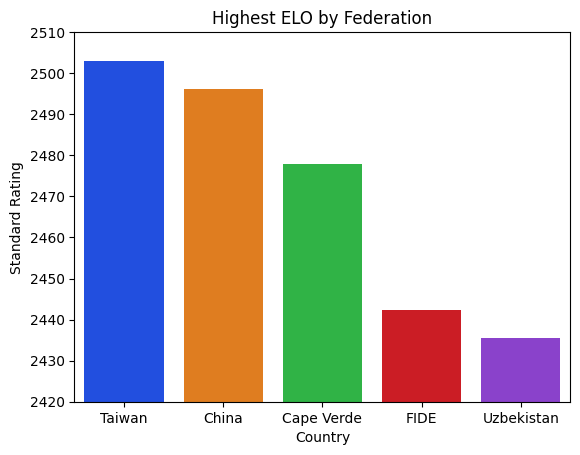

In [11]:
sns.barplot(data=fed_elos.head(5), palette= 'bright')
plt.ylim(2420, 2510)
plt.title('Highest ELO by Federation')
#plt.style.use("grayscale")
#plt.savefig('elo_por_fed.png', transparent= True)

elos medios por federaciones top 10 players

In [12]:
# con este snippet estoy generando un nuevo df en el que recojo los los top 10 jugadores de cada federacion
# genero un objeto groupby por federaciones sobre el que itero y selecciono los top 10 por rating general, los agrego a una lista con la que final mente concateo/genero un nuevo df para trabajar

grupos = df_active_2023.groupby('Country')
top_10_por_grupo = []

for nombre, pais in grupos:

    grupo_ordenado = pais.sort_values(by= 'Standard Rating', ascending= False)
    top_10 = grupo_ordenado.head(10)
    top_10_por_grupo.append(top_10)

df_top_10_por_fed = pd.concat(top_10_por_grupo)
# este nuevo df no esta agrupado 

C:\Users\franc\AppData\Local\Temp\ipykernel_6976\3655436295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fed_elos_top_10.head(5), palette= 'bright')


Text(0.5, 1.0, 'Highest ELO by Federation Top 10')

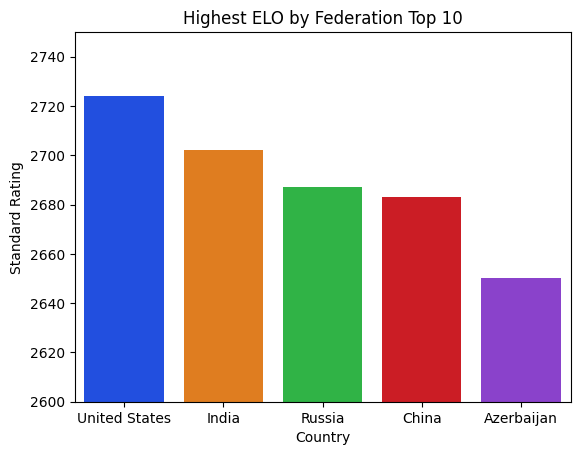

In [13]:
# agrupo el nuevo df por federaciones y saco la media de cada una, la ordeno para coger los 5 mejores y genero la grafica

fed_elos_top_10 = df_top_10_por_fed.groupby('Country')['Standard Rating'].mean().sort_values(ascending= False)

sns.barplot(data=fed_elos_top_10.head(5), palette= 'bright')
plt.ylim(2600, 2750)
plt.title('Highest ELO by Federation Top 10')
#plt.savefig('elo_por_fed_top_10.png', transparent= True)

In [14]:
fed_rapid.head(5)

Country
Cape Verde    2483.000000
China         2469.375000
FAI           2463.000000
FIDE          2410.224138
ZIM           2407.000000
Name: Rapid Rating, dtype: float64

In [15]:
fed_blitz.head(5)

Country
China         2457.523810
FAI           2439.000000
Georgia       2397.526316
Uzbekistan    2393.960000
FIDE          2393.779661
Name: Blitz Rating, dtype: float64

vamos a mirar las correlaciones entre los diferentes ratings y la edad

In [16]:
matriz = df_active_2023.corr(numeric_only= True)

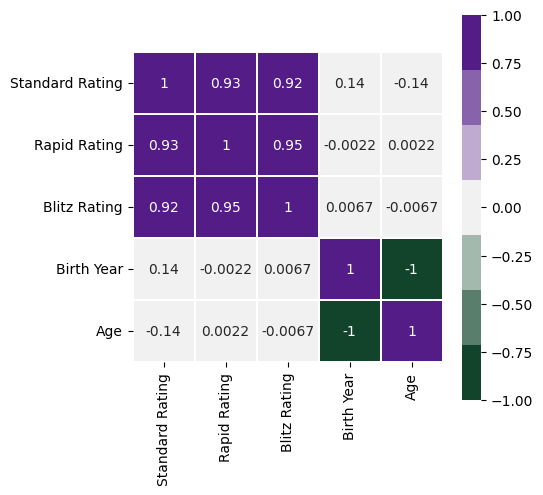

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(matriz,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

# como era previsible vemos una correlacion muy elevada entre los diferentes ratings (clasico, rapid y blitz)
# pense que quizas encontraria alguna correlacion entre la edad y los ratings, pero no

mejores jugadores

C:\Users\franc\AppData\Local\Temp\ipykernel_6976\1260952564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_active_2023.head(4)['Standard Rating'], palette= 'bright')


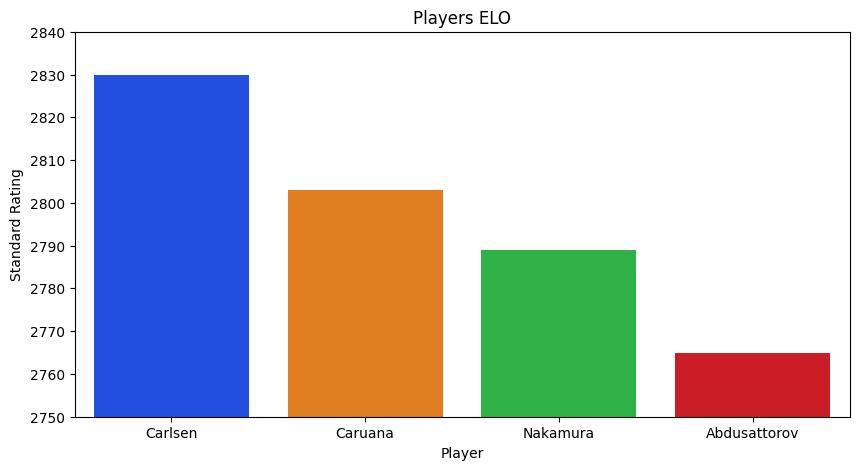

In [18]:
#names = df_active_2023.head(4).Name
names = ['Carlsen', 'Caruana', 'Nakamura', 'Abdusattorov']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize= (10, 5))
sns.barplot(df_active_2023.head(4)['Standard Rating'], palette= 'bright')
plt.ylim(2750, 2840)
plt.title('Players ELO')
plt.xlabel('Player')
plt.xticks(ticks= range(len(df_active_2023.head(4))), labels= names);
#plt.legend(names);
#plt.savefig('mayores_elo_por_jugador.png', transparent= True)

In [19]:
df_active_2023.head(4)

,Name,Title,Country,Standard Rating,Rapid Rating,Blitz Rating,Birth Year,Age
0,"Carlsen, Magnus",GM,Norway,2830.0,2818.0,2887.0,1990.0,33.0
1,"Caruana, Fabiano",GM,United States,2803.0,2765.0,2813.0,1992.0,31.0
2,"Nakamura, Hikaru",GM,United States,2789.0,2731.0,2874.0,1987.0,36.0
3,"Abdusattorov, Nodirbek",GM,Uzbekistan,2765.0,2727.0,2694.0,2004.0,19.0
